## caricamento e pulizia

In [42]:
import numpy as np
import pandas as pd
import kaggle
import xlrd
from matplotlib import pyplot as plt
import seaborn as sns

import os
#os.makedirs('./data')
os.chdir('./data')

kaggle.api.authenticate()
kaggle.api.dataset_download_files('yesshivam007/superstore-dataset',  unzip=True)

FileNotFoundError: [WinError 2] Impossibile trovare il file specificato: './data'

In [ ]:
#os.getcwd()

In [ ]:
print(os.listdir())

['Sample - Superstore.xls', 'Superstore.xlsx']


In [ ]:
P = pd.read_excel('Sample - Superstore.xls')
P.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
P.drop(['Row ID'], axis=1, inplace=True)
P['Order Date'] = pd.to_datetime(P['Order Date'], format='%d-%m-%Y')
P['Order Date_month'] = P['Order Date'].dt.month
P['Order Date_year'] = P['Order Date'].dt.year
P['Selling Price'] =( P['Sales']/(1-P['Discount'])) / P['Quantity']
P['Cost Price'] = (P['Sales'] - P['Profit']) / P['Quantity']
P.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          9994 non-null   object        
 1   Order Date        9994 non-null   datetime64[ns]
 2   Ship Date         9994 non-null   datetime64[ns]
 3   Ship Mode         9994 non-null   object        
 4   Customer ID       9994 non-null   object        
 5   Customer Name     9994 non-null   object        
 6   Segment           9994 non-null   object        
 7   Country           9994 non-null   object        
 8   City              9994 non-null   object        
 9   State             9994 non-null   object        
 10  Postal Code       9994 non-null   int64         
 11  Region            9994 non-null   object        
 12  Product ID        9994 non-null   object        
 13  Category          9994 non-null   object        
 14  Sub-Category      9994 n

In [ ]:
R = pd.read_excel('Sample - Superstore.xls' , sheet_name='Returns')
R.head()

,Returned,Order ID
0,Yes,CA-2017-153822
1,Yes,CA-2017-129707
2,Yes,CA-2014-152345
3,Yes,CA-2015-156440
4,Yes,US-2017-155999


In [ ]:
R.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Returned  296 non-null    object
 1   Order ID  296 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


In [ ]:
df = P.merge(R, on='Order ID', how='left')
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product Name,Sales,Quantity,Discount,Profit,Order Date_month,Order Date_year,Selling Price,Cost Price,Returned
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016,130.98,110.0232,NaN
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016,243.98,170.7860,NaN
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016,7.31,3.8743,NaN
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015,348.21,268.1217,NaN
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015,13.98,9.9258,NaN


In [ ]:
print("Value duplicate: ", df.duplicated().sum())
print('\n', 
      "Null value: ",'\n', df.isnull().sum())

Value duplicate:  1

 Null value:  
 Order ID               0
Order Date             0
Ship Date              0
Ship Mode              0
Customer ID            0
Customer Name          0
Segment                0
Country                0
City                   0
State                  0
Postal Code            0
Region                 0
Product ID             0
Category               0
Sub-Category           0
Product Name           0
Sales                  0
Quantity               0
Discount               0
Profit                 0
Order Date_month       0
Order Date_year        0
Selling Price          0
Cost Price             0
Returned            9194
dtype: int64


In [ ]:
dupl = df[df.duplicated()].index
df.drop(dupl, axis=0, inplace=True)

In [ ]:
df['Returned'] = df['Returned'].replace('Yes', 1).fillna(0).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9993 entries, 0 to 9993
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          9993 non-null   object        
 1   Order Date        9993 non-null   datetime64[ns]
 2   Ship Date         9993 non-null   datetime64[ns]
 3   Ship Mode         9993 non-null   object        
 4   Customer ID       9993 non-null   object        
 5   Customer Name     9993 non-null   object        
 6   Segment           9993 non-null   object        
 7   Country           9993 non-null   object        
 8   City              9993 non-null   object        
 9   State             9993 non-null   object        
 10  Postal Code       9993 non-null   int64         
 11  Region            9993 non-null   object        
 12  Product ID        9993 non-null   object        
 13  Category          9993 non-null   object        
 14  Sub-Category      9993 non-nu

C:\Users\feder\AppData\Local\Temp\ipykernel_10684\1985680348.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Returned'] = df['Returned'].replace('Yes', 1).fillna(0).astype(int)


In [ ]:
df.to_excel('df_tableau.xlsx')

## visualizzazioni

In [ ]:
df.describe()

,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Order Date_month,Order Date_year,Selling Price,Cost Price,Returned
count,9993,9993,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000
mean,2016-04-30 01:53:33.089162240,2016-05-04 00:53:19.039327488,55191.576403,229.852846,3.789753,0.156188,28.660971,7.810067,2015.722406,75.558577,53.110831,0.080056
min,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,1.000000,2014.000000,0.990000,0.544500,0.000000
25%,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.731000,5.000000,2015.000000,6.480000,3.473600,0.000000
50%,2016-06-26 00:00:00,2016-06-29 00:00:00,56560.000000,54.480000,3.000000,0.200000,8.671000,9.000000,2016.000000,19.980000,12.933600,0.000000
75%,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000,11.000000,2017.000000,76.980000,54.522000,0.000000
max,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000,12.000000,2017.000000,7546.160000,4074.926400,1.000000
std,NaN,NaN,32065.074478,623.276074,2.225149,0.206457,234.271476,3.284598,1.123479,188.966751,122.253930,0.271394


In [ ]:
# Visualizzazione dei costi
df[df['Product ID'] == 'FUR-BO-10001798']

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product Name,Sales,Quantity,Discount,Profit,Order Date_month,Order Date_year,Selling Price,Cost Price,Returned
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Bush Somerset Collection Bookcase,261.960,2,0.00,41.9136,11,2016,130.98,110.0232,0
5399,CA-2016-117681,2016-04-09,2016-04-14,Standard Class,HF-14995,Herbert Flentye,Consumer,United States,Los Angeles,California,...,Bush Somerset Collection Bookcase,556.665,5,0.15,6.5490,4,2016,130.98,110.0232,0
8634,CA-2017-159793,2017-08-25,2017-08-29,Standard Class,SV-20365,Seth Vernon,Consumer,United States,Philadelphia,Pennsylvania,...,Bush Somerset Collection Bookcase,130.980,2,0.50,-89.0664,8,2017,130.98,110.0232,0
9334,CA-2017-110198,2017-05-01,2017-05-02,First Class,AG-10900,Arthur Gainer,Consumer,United States,Coral Springs,Florida,...,Bush Somerset Collection Bookcase,314.352,3,0.20,-15.7176,5,2017,130.98,110.0232,0


In [ ]:
df['State'].value_counts().head()

State
California      2001
New York        1128
Texas            985
Pennsylvania     587
Washington       506
Name: count, dtype: int64

## Analisi Avanzata

### Permutation test

In [ ]:
from scipy import stats
stats.ttest_ind(df['Profit'],\
                df[df['Discount'] <= 0.2]['Profit'],\
                alternative='less')

TtestResult(statistic=-6.221730778216112, pvalue=2.511052625910084e-10, df=18592.0)

In [43]:
def permutation_test(df, n, plot=True):

    prf = df['Profit']
    prf_30 = df[df['Discount'] <= 0.2]['Profit']
    lnt = len(prf)


    obs_diff = prf.mean() - prf_30.mean()
    comb = np.concatenate([prf, prf_30])

    diffs = []
    for _ in range(n):
        new = np.random.permutation(comb)
        diff_ = new[:lnt].mean() - new[lnt:].mean()
        diffs.append(diff_)

    if plot:
      plt.figure(figsize=(10, 6))
      sns.histplot(diffs, bins=50)
      plt.axvline(obs_diff, color='r', linestyle='--', 
                  label=f'Differenza osservata: {obs_diff:.4f}')
      plt.axvline(np.percentile(diffs, 5), color='y', linestyle='--', 
                  label=f'Alpha (5%): {np.percentile(diffs, 95):.4f}')
      plt.title('Distribuzione delle differenze simulate sotto H0')
      plt.xlabel('Differenze tra le medie')
      plt.ylabel('Frequenza')
      plt.legend()
      plt.show()

    p_value = np.mean([abs(d) >= abs(obs_diff) for d in diffs])

    return obs_diff, diffs, p_value

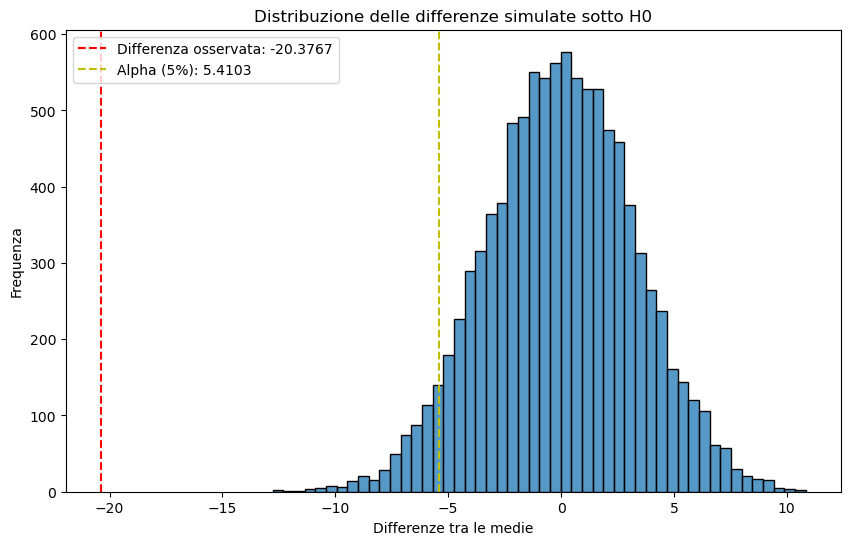

Differenza osservata: -20.3767
p-value: 0.0000


In [44]:
obs_diff, diffs, p_value = permutation_test(df, 10000)

print(f"Differenza osservata: {obs_diff:.4f}")
print(f"p-value: {p_value:.4f}")

Notando che il p-value è inferiore al livello di significatività al 5% , questo risultato è statisticamente significativo.

Questo significa che togliendo gli sconti maggiori del 30%, non sarebbe casuale un notevole incremento dei profitti.

### Regressione Logistica

In [68]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

accuracies_Train = []
precisions_Train = []
recalls_Train = []
f1_Train = []
confusion_matrices_Train = []

accuracies_Test = []
precisions_Test = []
recalls_Test = []
f1_Test = []
confusion_matrices_Test = []

len_retr = len(df[df['Returned'] == 1])*1.75
pre_mod = df.copy().drop([
    'Order ID', 'Order Date', 'Ship Date', 'Customer Name', 'Country', 
    'Postal Code', 'Segment', 'Product ID', 'Product Name', 'State', 
    'Category', 'Sub-Category', 'Profit', 'Quantity', 'Discount', 
    'Selling Price', 'Cost Price','Region','Order Date_year'], axis=1)
pre_mod.info()
pre_mod = pd.get_dummies(pre_mod, columns=(['Order Date_month']), dtype=int)
pre_mod = pd.get_dummies(pre_mod, dtype=int)

<class 'pandas.core.frame.DataFrame'>
Index: 9993 entries, 0 to 9993
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Ship Mode         9993 non-null   object 
 1   Customer ID       9993 non-null   object 
 2   City              9993 non-null   object 
 3   Sales             9993 non-null   float64
 4   Order Date_month  9993 non-null   int32  
 5   Returned          9993 non-null   int32  
dtypes: float64(1), int32(2), object(3)
memory usage: 468.4+ KB


In [69]:
len(pre_mod.columns)

1342

In [70]:
for i in range(100):
    
    df_mod = pd.concat([
        pre_mod[pre_mod['Returned'] == 0].sample(n=int(len_retr), replace=False),
        pre_mod[pre_mod['Returned'] == 1]])
    
    y = df_mod['Returned']
    X = df_mod.drop(['Returned'], axis=1)

    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    log_reg = LogisticRegression(max_iter=5000, solver='liblinear')
    log_reg.fit(X_train, y_train)

    pred_train = log_reg.predict(X_train)
    pred_test = log_reg.predict(X_test)


    accuracies_Train.append(metrics.accuracy_score(y_train, pred_train))
    precisions_Train.append(metrics.precision_score(y_train, pred_train))
    recalls_Train.append(metrics.recall_score(y_train, pred_train))
    f1_Train.append(metrics.f1_score(y_train, pred_train))
    confusion_matrices_Train.append(metrics.confusion_matrix(y_train, pred_train))

    accuracies_Test.append(metrics.accuracy_score(y_test, pred_test))
    precisions_Test.append(metrics.precision_score(y_test, pred_test))
    recalls_Test.append(metrics.recall_score(y_test, pred_test))
    f1_Test.append(metrics.f1_score(y_test, pred_test))
    confusion_matrices_Test.append(metrics.confusion_matrix(y_test, pred_test))


print("Metriche di Classificazione Train:")
print(f"Media Accuracy: {np.mean(accuracies_Train)*100:.2f}%")
print(f"Media Precision: {np.mean(precisions_Train)*100:.2f}%")
print(f"Media Recall: {np.mean(recalls_Train)*100:.2f}%")
print(f"F1 Score medio: {np.mean(f1_Train)*100:.2f}%")
print(f"Media Confusion Matrice: {np.mean(confusion_matrices_Train, axis=0)}")
print("\n") 
print("Metriche di Classificazione Test:")
print(f"Media Accuracy: {np.mean(accuracies_Test)*100:.2f}%")
print(f"Media Precision: {np.mean(precisions_Test)*100:.2f}%")
print(f"Media Recall: {np.mean(recalls_Test)*100:.2f}%")
print(f"F1 Score medio: {np.mean(f1_Test)*100:.2f}%")
print(f"Media Confusion Matrice: {np.mean(confusion_matrices_Test, axis=0)}")

Metriche di Classificazione Train:
Media Accuracy: 90.30%
Media Precision: 91.89%
Media Recall: 80.37%
F1 Score medio: 85.74%
Media Confusion Matrice: [[1075.69   45.38]
 [ 125.34  513.59]]


Metriche di Classificazione Test:
Media Accuracy: 80.63%
Media Precision: 78.69%
Media Recall: 64.82%
F1 Score medio: 70.96%
Media Confusion Matrice: [[250.5   28.43]
 [ 56.78 104.29]]
